In [1]:
import json
import pandas as pd
import numpy as np
import nltk
import re

from nltk.corpus import stopwords
from gensim.models import Word2Vec
from gensim.similarities.annoy import AnnoyIndexer

%config InlineBackend.figure_format = 'retina';

In [2]:
df = pd.read_json("JEOPARDY_QUESTIONS1.json")

In [3]:
df

,category,air_date,question,value,answer,round,show_number
0,HISTORY,2004-12-31,"'For the last 8 years of his life, Galileo was...",$200,Copernicus,Jeopardy!,4680
1,ESPN's TOP 10 ALL-TIME ATHLETES,2004-12-31,'No. 2: 1912 Olympian; football star at Carlis...,$200,Jim Thorpe,Jeopardy!,4680
2,EVERYBODY TALKS ABOUT IT...,2004-12-31,'The city of Yuma in this state has a record a...,$200,Arizona,Jeopardy!,4680
3,THE COMPANY LINE,2004-12-31,"'In 1963, live on ""The Art Linkletter Show"", t...",$200,McDonald\'s,Jeopardy!,4680
4,EPITAPHS & TRIBUTES,2004-12-31,"'Signer of the Dec. of Indep., framer of the C...",$200,John Adams,Jeopardy!,4680
...,...,...,...,...,...,...,...
216925,RIDDLE ME THIS,2006-05-11,'This Puccini opera turns on the solution to 3...,$2000,Turandot,Double Jeopardy!,4999
216926,"""T"" BIRDS",2006-05-11,'In North America this term is properly applie...,$2000,a titmouse,Double Jeopardy!,4999
216927,AUTHORS IN THEIR YOUTH,2006-05-11,"'In Penny Lane, where this ""Hellraiser"" grew u...",$2000,Clive Barker,Double Jeopardy!,4999
216928,QUOTATIONS,2006-05-11,"'From Ft. Sill, Okla. he made the plea, Arizon...",$2000,Geronimo,Double Jeopardy!,4999


In [5]:
categories = set([i.lower() for i in df['category']])
categories = list(categories)
# categories

In [6]:
len(categories)

27916

In [7]:
len(list(set([i for i in df.category])))

27995

In [8]:
categories = [re.sub('[^a-zA-Z]', ' ', cat) for cat in categories]
categories = [re.sub(r'\s+', ' ', cat) for cat in categories]
categories = [c.strip() for c in categories]

In [9]:
category = [nltk.sent_tokenize(c) for c in categories] 

all_words = [nltk.word_tokenize(c) for cat in category for c in cat]

# Removing Stop Words
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [10]:
# all_words

In [11]:
word2vec = Word2Vec(all_words, min_count=2)

In [12]:
vocabulary = word2vec.wv
vocabulary

In [13]:
vocabulary.most_similar('history')

[('movie', 0.9159721732139587),
 ('american', 0.9148614406585693),
 ('world', 0.9090409278869629),
 ('tv', 0.905121386051178),
 ('name', 0.8996865749359131),
 ('names', 0.8958664536476135),
 ('u', 0.8928185105323792),
 ('old', 0.8911356925964355),
 ('sports', 0.8869459629058838),
 ('words', 0.8865644931793213)]

In [14]:
vocabulary.most_similar('world')

[('movie', 0.9344976544380188),
 ('u', 0.930778980255127),
 ('tv', 0.916785478591919),
 ('american', 0.916620135307312),
 ('first', 0.911615788936615),
 ('sports', 0.9092313647270203),
 ('history', 0.9090411067008972),
 ('names', 0.9068677425384521),
 ('national', 0.90635085105896),
 ('words', 0.9060530066490173)]

In [15]:
annoy_index = AnnoyIndexer(word2vec, 100)
# Derive the vector for the word "science" in our model
vector = vocabulary["history"]
# The instance of AnnoyIndexer we just created is passed
approximate_neighbors = vocabulary.most_similar([vector], topn=11, indexer=annoy_index)
# Neatly print the approximate_neighbors and their corresponding cosine similarity values
print("Approximate Neighbors")
for neighbor in approximate_neighbors:
    print(neighbor)

normal_neighbors = vocabulary.most_similar([vector], topn=11)
print("\nExact Neighbors")
for neighbor in normal_neighbors:
    print(neighbor)

Approximate Neighbors
('history', 0.9997009900107514)
('movie', 0.7950268387794495)
('american', 0.7936765551567078)
('world', 0.7867407500743866)
('tv', 0.7821941524744034)
('name', 0.7760426849126816)
('names', 0.7718183696269989)
('u', 0.7685030847787857)
('old', 0.7666929513216019)
('sports', 0.7622456550598145)
('words', 0.761845052242279)

Exact Neighbors
('history', 1.0000001192092896)
('movie', 0.9159721732139587)
('american', 0.9148614406585693)
('world', 0.9090409278869629)
('tv', 0.905121386051178)
('name', 0.8996865749359131)
('names', 0.8958664536476135)
('u', 0.8928185105323792)
('old', 0.8911356925964355)
('sports', 0.8869459629058838)
('words', 0.8865644931793213)


In [16]:
def summary(x:str):
    annoy_index = AnnoyIndexer(word2vec, 100)
    vector = vocabulary[x]
    # The instance of AnnoyIndexer we just created is passed
    approximate_neighbors = vocabulary.most_similar([vector], topn=11, indexer=annoy_index)
    # Neatly print the approximate_neighbors and their corresponding cosine similarity values
    print("Approximate Neighbors")
    for neighbor in approximate_neighbors:
        print(neighbor)

    normal_neighbors = vocabulary.most_similar([vector], topn=11)
    print("\nExact Neighbors")
    for neighbor in normal_neighbors:
        print(neighbor)

In [17]:
summary('science')

Approximate Neighbors
('science', 1.0)
('world', 0.747286319732666)
('literary', 0.7463537156581879)
('movies', 0.7405868470668793)
('american', 0.7396434545516968)
('category', 0.7353701591491699)
('u', 0.7333124279975891)
('old', 0.7317646145820618)
('words', 0.7308229506015778)
('tv', 0.728020429611206)
('first', 0.7262502014636993)

Exact Neighbors
('science', 1.0)
('world', 0.8722715973854065)
('literary', 0.8713270425796509)
('movies', 0.8654097318649292)
('american', 0.8644289374351501)
('category', 0.8599420189857483)
('u', 0.8577556014060974)
('old', 0.8560994267463684)
('words', 0.8550872802734375)
('tv', 0.8520543575286865)
('first', 0.8501222133636475)


## From the .py file

In [20]:
from jeopardy_funcs import *

In [21]:
word2vec, vocabulary = w2v(df)

In [22]:
summary('history', word2vec, vocabulary)

Approximate Neighbors
('history', 1.0)
('names', 0.7872944474220276)
('american', 0.7869261354207993)
('tv', 0.7846818715333939)
('movie', 0.7837409526109695)
('world', 0.7835408747196198)
('sports', 0.7744621485471725)
('u', 0.7715628892183304)
('words', 0.7681705206632614)
('name', 0.7680346071720123)
('old', 0.7632207274436951)

Exact Neighbors
('history', 1.0000001192092896)
('names', 0.9095125794410706)
('american', 0.9091989398002625)
('tv', 0.9072762131690979)
('movie', 0.9064640998840332)
('world', 0.9062909483909607)
('sports', 0.8982654213905334)
('u', 0.8956328630447388)
('words', 0.8925102949142456)
('name', 0.8923840522766113)
('old', 0.8878712058067322)


## Plotting, maybe

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# modelPath=word2vec
# model = g.Doc2Vec.load(modelPath)
model = vocabulary

vocab = list(vocabulary.key_to_index)

X = model[vocab]
# print len(X)
# print X[0]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
df

,x,y
words,-48.919350,-50.528927
tv,-49.033886,-50.831650
world,-48.660816,-50.233524
history,-47.523609,-49.580719
u,-48.535522,-50.195309
...,...,...
michigander,28.932594,4.208997
valleys,-12.684545,-17.329243
stumpers,13.646111,31.289963
arsenic,32.528923,38.698406


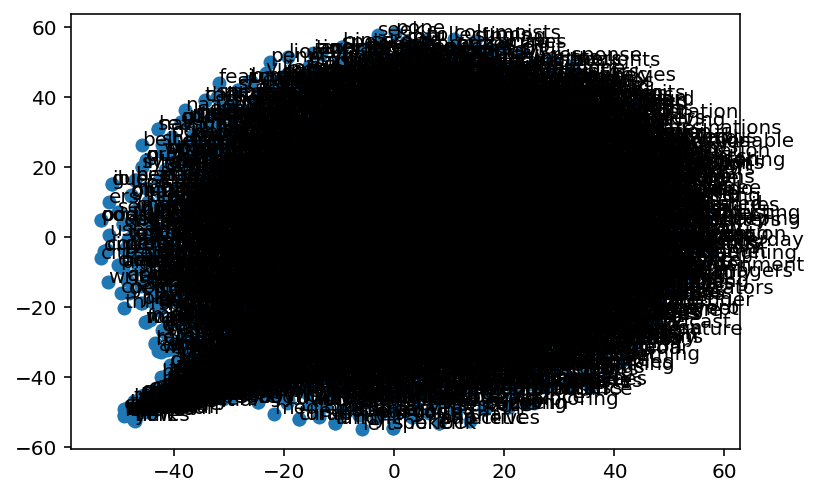

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for word, pos in df.iterrows():
    ax.annotate(word, pos)
    
ax.scatter(df['x'], df['y'])

plt.show()